In [1]:
include("./Opacity.jl")
include("./utils/Constants.jl")
using PyPlot

7.360384956421225e-7
1.2991913775254976e-7


In [2]:
sigma_n_b1e17_t1mev_lowdensity = [7.778990987420739e-45, 3.687426376279251e-44, 1.7570246587074735e-43, 8.058481616902194e-43, 3.247322444995863e-42, 9.648957639008996e-42, 1.8277940635281547e-41, 2.389554329931399e-41, 2.5940367447684583e-41, 2.654844550153016e-41, 2.6674640290705736e-41, 2.667228300794447e-41, 2.6609023397776513e-41, 2.6629424016380714e-41, 2.3720659097910184e-41, 2.2589052802796264e-41, 2.6278444072160873e-41, 2.6488247334664534e-41, 2.662110563180715e-41, 1.7550906787180635e-41]
sigma_p_b1e17_t1mev_lowdensity = [6.12125799479412e-44, 2.435672480489152e-42, 3.521160247540954e-41, 4.0575786794812754e-41, 3.9760148867713077e-41, 3.867361016457994e-41, 3.7723844460531513e-41, 3.6392943840085946e-41, 3.6087191100996366e-41, 3.539598795974697e-41, 3.473604096288451e-41, 3.4170321166074697e-41, 3.3585274595659607e-41, 3.313355648679521e-41, 3.267051794561961e-41, 3.2225282062185905e-41, 3.183731440947563e-41, 3.144704045111338e-41, 3.101325066230057e-41, 2.7856337302672723e-41]

opacity_n_b1e17_t1mev_lowdensity = sigma_n_b1e17_t1mev_lowdensity *1e39*0.16*0.001*0.25*3
opacity_p_b1e17_t1mev_lowdensity = sigma_p_b1e17_t1mev_lowdensity *1e39*0.16*0.001*0.25

20-element Vector{Float64}:
 2.4485031979176474e-9
 9.742689921956607e-8
 1.4084640990163817e-6
 1.6230314717925102e-6
 1.5904059547085232e-6
 1.5469444065831975e-6
 1.5089537784212603e-6
 1.4557177536034377e-6
 1.4434876440398545e-6
 1.4158395183898787e-6
 1.3894416385153802e-6
 1.3668128466429878e-6
 1.3434109838263842e-6
 1.3253422594718085e-6
 1.3068207178247841e-6
 1.289011282487436e-6
 1.273492576379025e-6
 1.2578816180445352e-6
 1.2405300264920227e-6
 1.114253492106909e-6

In [3]:
Opacity.opacity

opacity (generic function with 1 method)

In [4]:
neutrino_energy_points = LinRange(0, 30, 20)
new_kappa_n_outputs = []
new_kappa_p_outputs = []
for point in neutrino_energy_points
	push!(new_kappa_n_outputs, Opacity.opacity('n', (197.3^3 * 0.16 * 0.001), 0.25, point, pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 1))
	push!(new_kappa_p_outputs, Opacity.opacity('p', (197.3^3 * 0.16 * 0.001), 0.25, point, pi/2, ELEM_CHARGE*GAUSS_TO_MEV2*1e17, 1))
end

In [9]:
new_kappa_p_outputs

20-element Vector{Any}:
 1.348045813057023e-7
 1.3481269531196614e-7
 1.3483700981277765e-7
 1.3487744240967957e-7
 1.3493385628895705e-7
 1.3500606099291742e-7
 1.3509381349114622e-7
 1.3519681954330606e-7
 1.353147353427841e-7
 1.354471694283407e-7
 1.3559368484888303e-7
 1.3575380156461594e-7
 1.3592699906610824e-7
 1.3611271919128747e-7
 1.3631036911904375e-7
 1.3651932451699923e-7
 1.3673893282009085e-7
 1.3696851661592817e-7
 1.3720737711242857e-7
 1.3745479766299708e-7

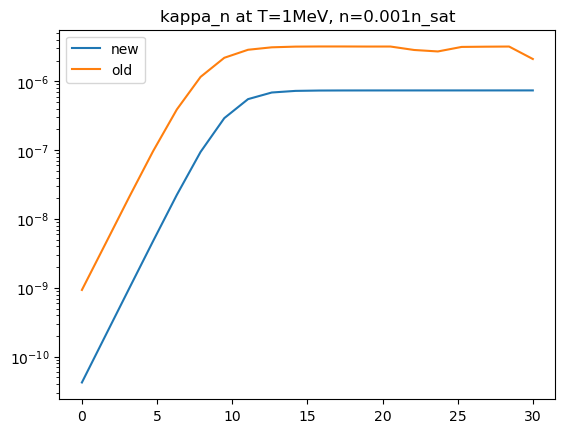

In [13]:
plot(neutrino_energy_points, new_kappa_n_outputs, label="new")
plot(neutrino_energy_points, opacity_n_b1e17_t1mev_lowdensity, label="old")
gca()[:set_yscale]("log")
title("kappa_n at T=1MeV, n=0.001n_sat")
legend()
PyPlot.display_figs()

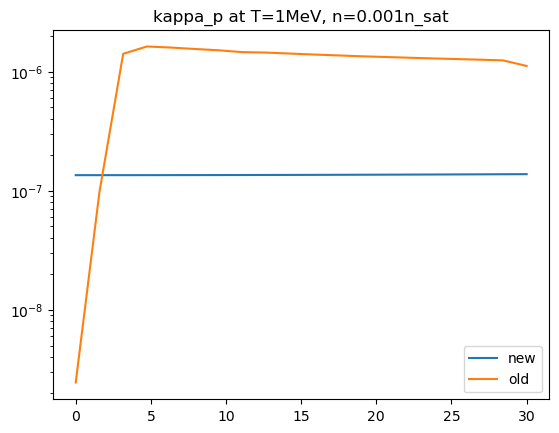

In [15]:
plot(neutrino_energy_points, new_kappa_p_outputs, label="new")
plot(neutrino_energy_points, opacity_p_b1e17_t1mev_lowdensity, label="old")
gca()[:set_yscale]("log")
title("kappa_p at T=1MeV, n=0.001n_sat")
legend()
PyPlot.display_figs()